In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine = pd.read_csv('/Users/zeal.v/Desktop/Computer-Vision_Project_Masterschool/DATA/wine.csv', index_col=0)

In [3]:
wine.head()

,Winery,Year,Wine ID,Wine,Rating,num_review,price,Country,Region
0,Vinicola de Castilla,2022,6151295,Palacio del Marques 2022,3.5,64,2.00,España,La Mancha
1,Calabuig,2022,3957265,Tinto 2022,3.6,2294,2.85,España,Valencia
2,Finca Vieja,2021,1243721,Crianza 2021,3.2,939,2.90,España,La Mancha
3,Finca Venta de Don Quijote,2023,1374696,Red Blend 2023,3.0,64,2.96,España,La Mancha
4,Castillo de Liria,2021,1643745,Bobal - Shiraz 2021,3.3,138,3.10,España,Valencia


- Shape of our data is:
     - here we can see how many rows and columns we have

In [4]:
wine.shape

(14600, 9)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14600 entries, 0 to 14599
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Winery      14600 non-null  object 
 1   Year        14598 non-null  object 
 2   Wine ID     14600 non-null  int64  
 3   Wine        14600 non-null  object 
 4   Rating      14600 non-null  float64
 5   num_review  14600 non-null  int64  
 6   price       14600 non-null  float64
 7   Country     14600 non-null  object 
 8   Region      14600 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.1+ MB


 - Here is Stat info abour our data:
   - We can see that our data are normaly distributed, there is no big outliers.

In [6]:
wine.describe().round(2)

,Wine ID,Rating,num_review,price
count,14600.00,14600.00,14600.00,14600.00
mean,3379977.90,3.81,633.10,11.35
std,3303539.85,0.21,1594.19,1.70
min,1616.00,2.40,25.00,2.00
25%,1173873.00,3.60,90.00,11.95
50%,2040817.00,3.90,178.00,11.99
75%,5282020.00,3.90,542.25,12.00
max,12843958.00,4.30,91508.00,12.00


In [7]:
wine.groupby('Winery').agg({'price': ['count']}).sort_values(by=('price', 'count'), ascending=False).head(10)

,price
,count
Winery,
Familia Torres,508
Juan Gil,500
Bodegas Valdemar,499
Bodegas Cosme Palacio,499
Bodegas Valdelana,496
Montecillo,494
Azul y Garanza,493
Coca i Fitó,493


<Axes: ylabel='price'>

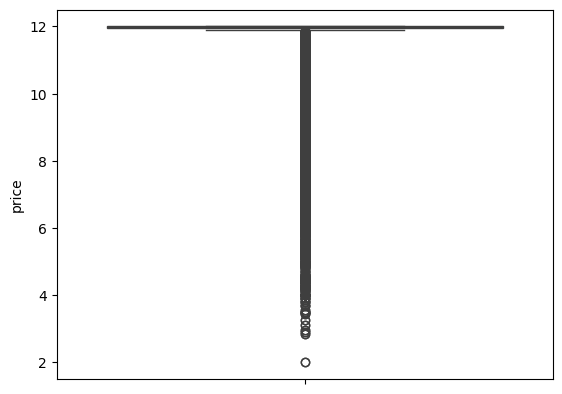

In [8]:
sns.boxplot(y='price', data=wine)


<Axes: ylabel='price'>

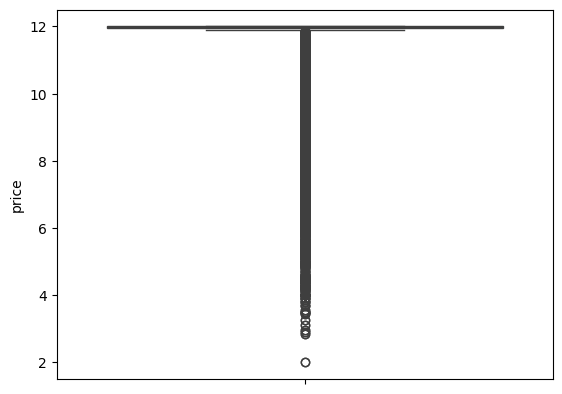

In [9]:
sns.boxplot(y=wine["price"])

<Axes: xlabel='price', ylabel='Count'>

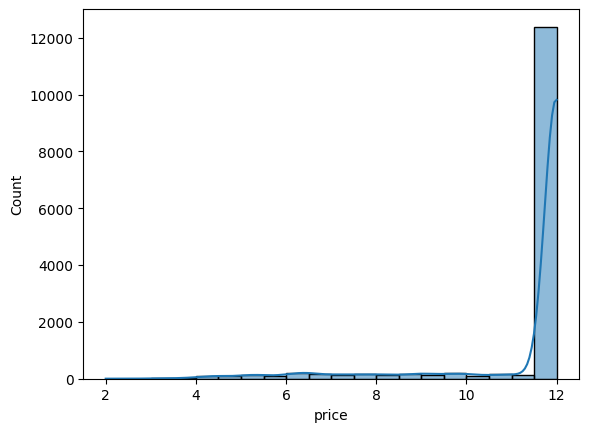

In [10]:
sns.histplot(wine['price'], bins=20, kde=True)

<Axes: xlabel='price', ylabel='Count'>

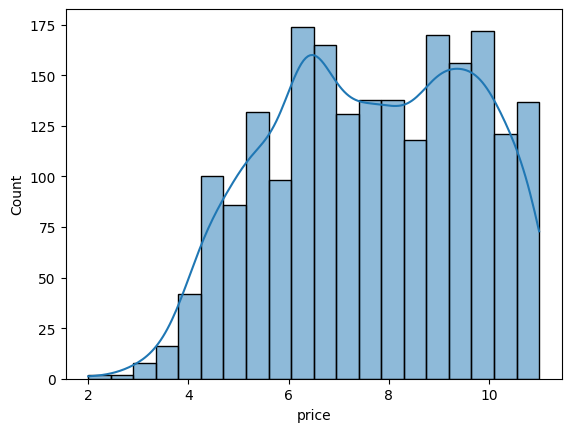

In [11]:
wine_12 = wine[wine['price'] <= 11]
sns.histplot(wine_12['price'], bins=20, kde=True)

<Axes: ylabel='price'>

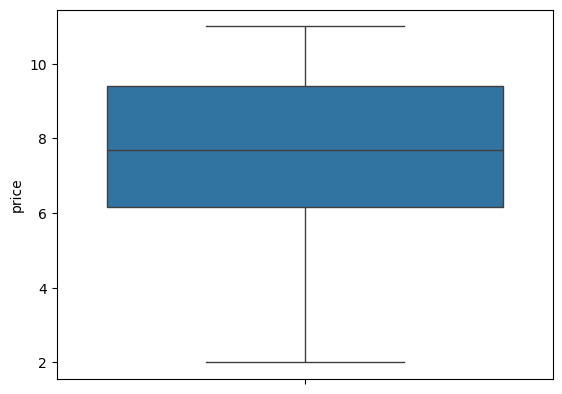

In [12]:
sns.boxplot(y=wine_12["price"])

In [13]:
wine.isnull().sum()

Winery        0
Year          2
Wine ID       0
Wine          0
Rating        0
num_review    0
price         0
Country       0
Region        0
dtype: int64

In [14]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14600 entries, 0 to 14599
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Winery      14600 non-null  object 
 1   Year        14598 non-null  object 
 2   Wine ID     14600 non-null  int64  
 3   Wine        14600 non-null  object 
 4   Rating      14600 non-null  float64
 5   num_review  14600 non-null  int64  
 6   price       14600 non-null  float64
 7   Country     14600 non-null  object 
 8   Region      14600 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.1+ MB


In [15]:
# Replace non-numeric values with NaN
wine['Year'] = pd.to_numeric(wine['Year'], errors='coerce')

# Fill NaN values with a default value, e.g., 0
wine['Year'] = wine['Year'].fillna(0).astype(int)

In [16]:
np.min(wine['Year'])

0

In [17]:
wine_12 = wine[wine['Year'] != 0]

In [18]:
np.min(wine_12['Year'])

2010

In [19]:
np.max(wine_12['Year'])

2024